In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Airline_DelayGroup_Count.csv')

In [3]:
df_2 = pd.DataFrame({'Airline':[], 'Before_Time': [], 'Cancelled': [], 'Large_Delay': [], 'Medium_Delay': [], 'On_Time': [], 'Small_delay': []})

In [4]:
airlines = np.unique(df.loc[:,'Airline'])
delay_groups = np.unique(df.loc[:,'DelayGroup'])

In [5]:
for i in delay_groups:
  df_2.loc[:,i] = df.loc[df['DelayGroup'] == i,['Airline','Number of Flights']].sort_values(by=['Airline']).iloc[:,1].tolist()

In [6]:
df_2.loc[:,'Airline'] = sorted(airlines)

In [7]:
df_2['Sum'] = df_2.iloc[:,1] + df_2.iloc[:,2] + df_2.iloc[:,3] + df_2.iloc[:,4] + df_2.iloc[:,5] + df_2.iloc[:,6]

In [8]:
df_2 = df_2.sort_values(by=['Sum'], ascending=False)

Text(0.5, 1.0, 'Number of Flights with Delay Status by each Airline')

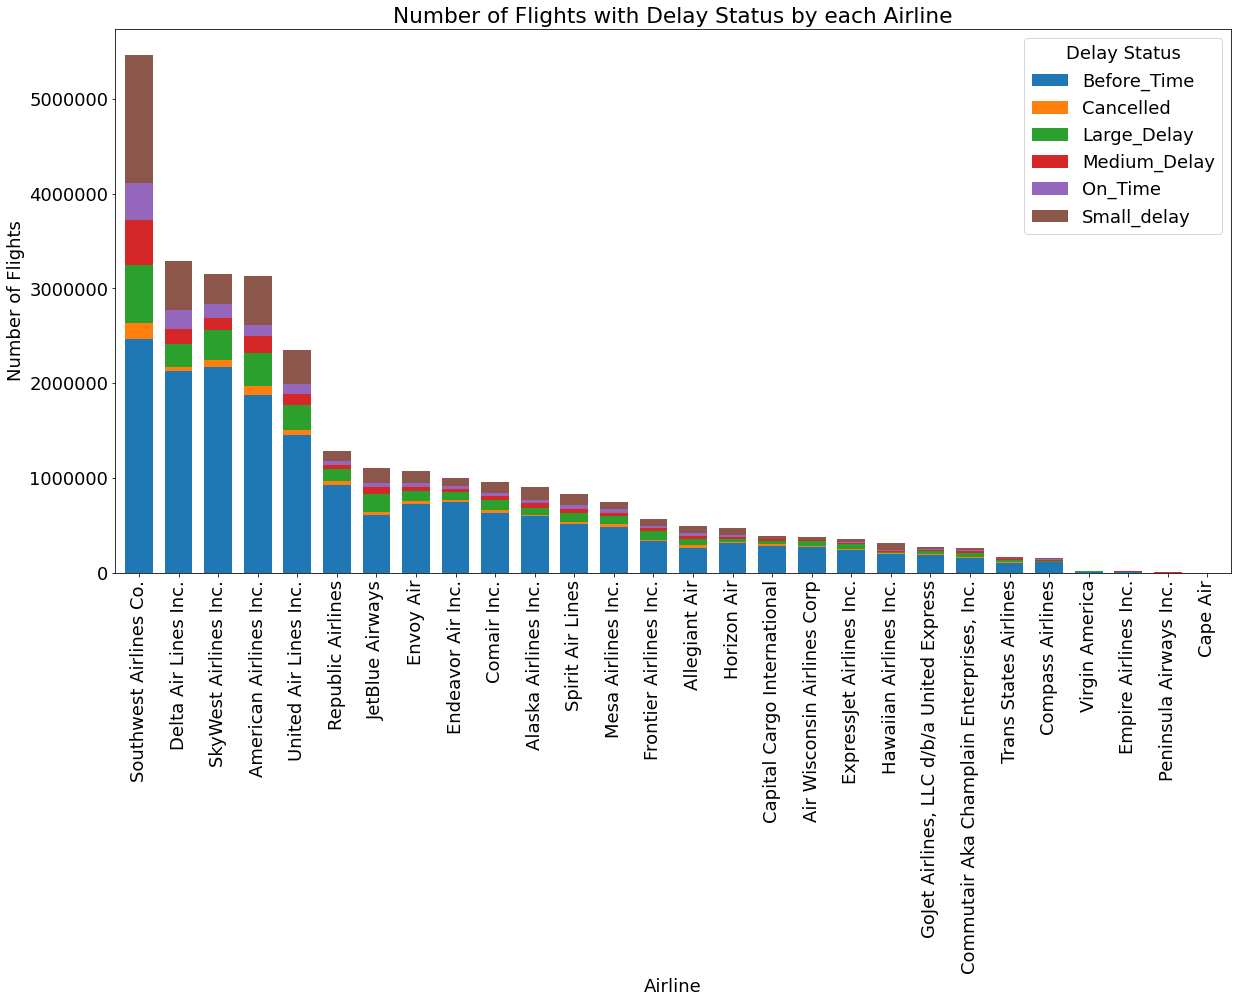

In [9]:
plt.rcParams.update({'font.size': 18}) # must set in top
fig_1 = df_2.iloc[:,list(range(0,7))].plot(x='Airline', kind='bar', stacked=True, figsize=(20, 10), width=0.7)
fig_1.yaxis.set_major_formatter(FormatStrFormatter('%d'))
fig_1.set_ylabel('Number of Flights')
fig_1.legend(title='Delay Status')
fig_1.set_title('Number of Flights with Delay Status by each Airline')